<a href="https://colab.research.google.com/github/AnaClarice382/data_science_analysis/blob/master/EDA_Oferta_Relampago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
###Importando os pacotes necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import plotly.express as px



#EDA - Oferta Relampago
---
##Objetivo: Gerar insights
---
**Descritivas**
  * Qual categoria possui mais oferta?
  * Qual categoria vende mais em quantidade? 
  * Qual categoria vende mais em valor?
  * Qual vertical possui mais oferta?
  * Qual vertical vende mais em quantidade? 
  * Qual vertical vende mais em valor?
  * Quantas venderam com estoque negativo ?
  * Qual produto foi mais vendido no menor intervalo de oferta?

**Detecção de anomalias**
  * Distribuição de valor vendido e quantidade vendida por categoria

**Inferenciais**
  * Ofertas que vendem mais tem o intervalo de tempo menor?
  * Quantidade de itens vendidos tem relação com a entrega grátis? 
  * Dia da semana pode está relacionado com maiores vendas? [dumizar]
  * O horário pode está relacionado com maiores vendas? [Categorizar][dumizar]
  * Quantidade de itens vendidos tem relação com qtde de ofertas? [dumizar]

Conhecendo o dataframe

| Coluna | Descrição |
|--------|-----------|
|OFFER_START_DATE| Data de inicio da oferta|
|OFFER_START_DTTM| Data/Hora inicio da oferta|
|OFFER_FINISH_DTTM| Data/Hora fim da oferta|
|OFFER_TYPE| Tipo da oferta|
|INVOLVED_STOCK| Estoque |
|REMAINING_STOCK_AFTER_END| Estoque ao final da oferta |
|SOLD_AMOUNT| Valor vendido|
|SOLD_QUANTITY| Quantidade vendida|
|ORIGIN| Origem|
|SHIPPING_PAYMENT_TYPE| Tipo do envio|
|DOM_DOMAIN_AGG1| Algo como Categoria|
|VERTICAL| Algo como segmento|
|DOMAIN_ID| Algo como Id Categoria|

## Descritivas

In [219]:
df = pd.read_csv("/content/ofertas_relampago.csv")
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [83]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


DOM_DOMAIN_AGG1    48746
dtype: int64

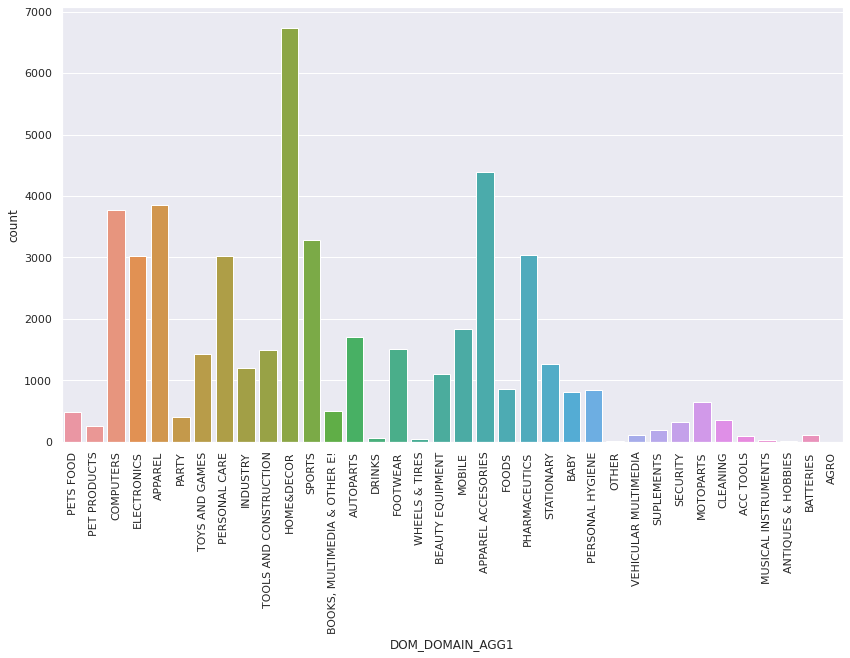

In [84]:
#Qual categoria tem mais ofertadas cadastradas?
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.countplot(x="DOM_DOMAIN_AGG1", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

df.count()[['DOM_DOMAIN_AGG1']]

Legal, a HOME&DECOR é a categoria que tem mais ofertas, mas será que é a categoria mais vendida? 



In [66]:
print('Quantidade vendida da categoria HOME&DECOR: ', int(df[df['DOM_DOMAIN_AGG1']=='HOME&DECOR']['SOLD_QUANTITY'].sum()))
print('Valor total das vendas da categoria HOME%DECOR: ',df[df['DOM_DOMAIN_AGG1']=='HOME&DECOR']['SOLD_AMOUNT'].sum())

Quantidade vendida da categoria HOME&DECOR:  18269
Valor total das vendas da categoria HOME%DECOR:  87761.65


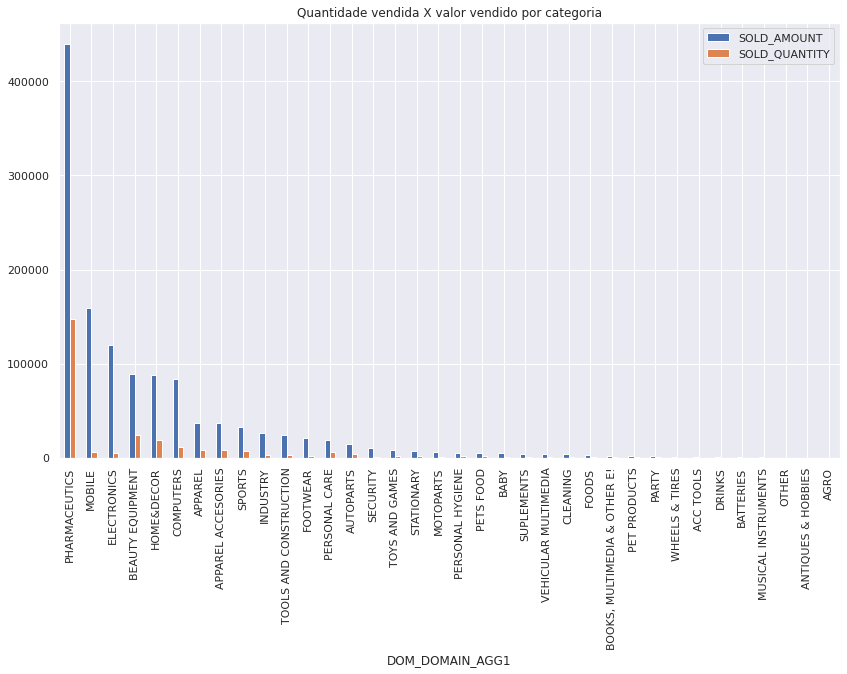

In [67]:
df_agg_sum = df.groupby('DOM_DOMAIN_AGG1')[['SOLD_AMOUNT','SOLD_QUANTITY']].sum().sort_values(by="SOLD_AMOUNT", ascending=False)
df_agg_sum.plot.bar(title="Quantidade vendida X valor vendido por categoria")

In [68]:
max_solded_quantity = df['SOLD_QUANTITY'].sum()
max_solded_amount = df['SOLD_AMOUNT'].sum()

df_agg_sum['OFFERS_QUANTITY'] = df['DOM_DOMAIN_AGG1'].value_counts()
df_agg_sum['PERCENTUAL_QUANTITY'] = ((df_agg_sum['SOLD_QUANTITY'] / max_solded_quantity) * 100)
df_agg_sum['PERCENTUAL_AMOUNT'] = ((df_agg_sum['SOLD_AMOUNT'] / max_solded_amount) * 100)

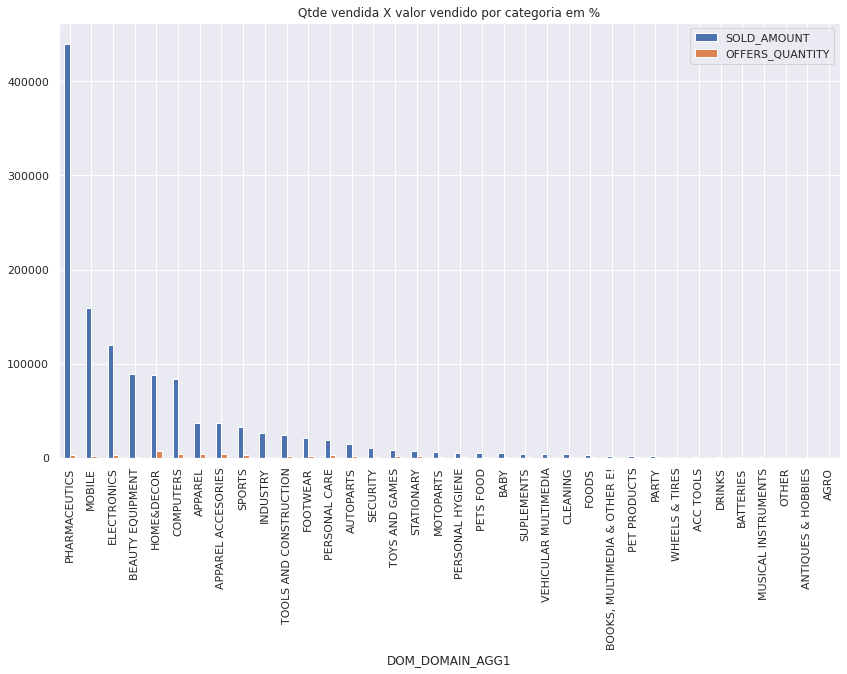

In [69]:
df_agg_sum[['SOLD_AMOUNT',"OFFERS_QUANTITY"]].plot.bar(title="Qtde vendida X valor vendido por categoria em %")

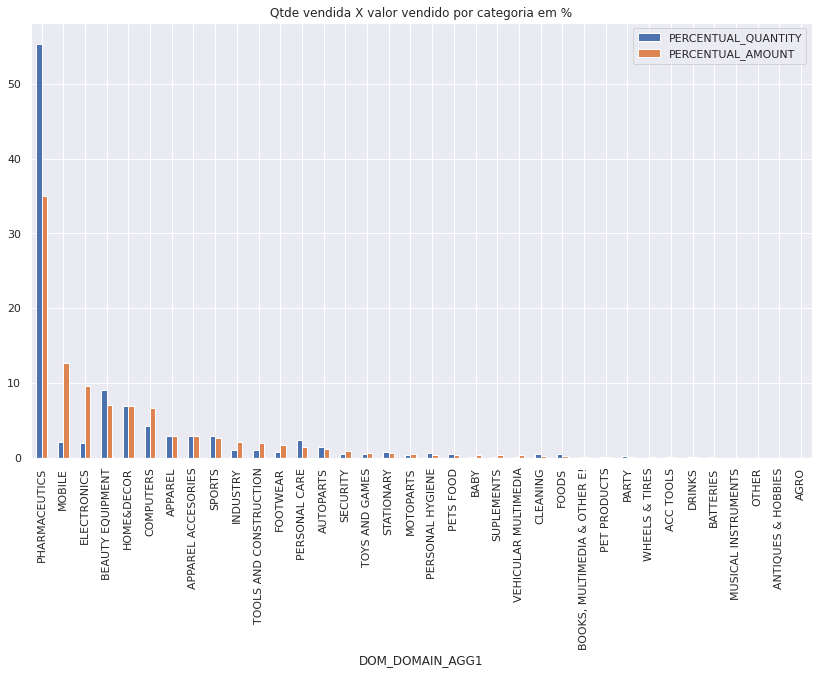

In [70]:
df_agg_sum[['PERCENTUAL_QUANTITY',"PERCENTUAL_AMOUNT"]].plot.bar(title="Qtde vendida X valor vendido por categoria em %")

In [71]:
percentual_pharma = round(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['DOM_DOMAIN_AGG1'].count() /  df['DOM_DOMAIN_AGG1'].count() * 100)
print('Tiveram {0} ofertas da categoria PHARMACEUTICS que representa {1}% das ofertas'.format(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['DOM_DOMAIN_AGG1'].count(), percentual_pharma))
print('Quantidade vendida da categoria PHARMACEUTICS: {0}. Quantidade vendida total: {1}'.format(int(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['SOLD_QUANTITY'].sum()), int(max_solded_quantity)))
print('Valor total das vendas da categoria PHARMACEUTICS: {0}. Valor vendido total: {1}'.format(np.round(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['SOLD_AMOUNT'].sum(), decimals=2), np.round(max_solded_amount, decimals=2)))

Tiveram 3035 ofertas da categoria PHARMACEUTICS que representa 6% das ofertas
Quantidade vendida da categoria PHARMACEUTICS: 147697. Quantidade vendida total: 266708
Valor total das vendas da categoria PHARMACEUTICS: 440216.74. Valor vendido total: 1258663.5


TOP 10 Categorias que menos venderam em quantidade

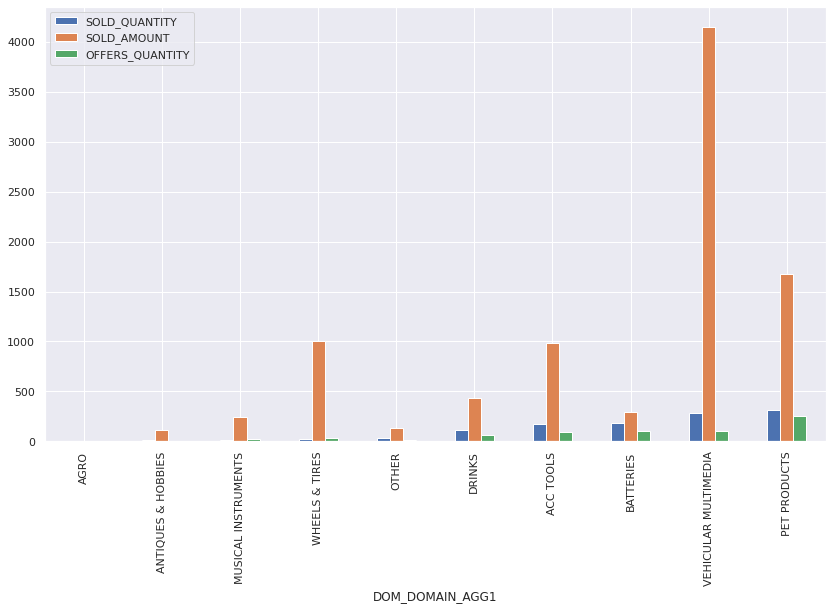

In [72]:
df_agg_sum[['SOLD_QUANTITY', 'SOLD_AMOUNT','OFFERS_QUANTITY']].sort_values(by='SOLD_QUANTITY', ascending=True).iloc[0:10].plot.bar()

### Conclusões até o momento
* A categoria que possui mais ofertas é a: **HOME&DECOR**.
* Porém apesar de ser a mais ofertada, está apenas no TOP 5 de categorias que gera mais valor.
* A categoria **PHARMACEUTICS** é a que mais gera valor e também é a categoria que mais vende em quantidade
* A categoria **PHARMACEUTICS** representa mais de 50% das mercadorias vendidas em quantidade, e representa mais que 30% do valor das mercadorias vendidas. Mesmo sendo uma categoria que possui poucas ofertas.
* Agro foi a categoria que menos vendeu, mas também foi a menos ofertada, com apenas 1 oferta. 


## Inferenciais 

In [73]:
### function that create a new boolean column in dataframe
def create_new_boolean_column(df, condiction, columnName):
    df.loc[~condiction, columnName] = 0
    df.loc[condiction, columnName] = 1
    df[columnName] = df[columnName].astype(int)

In [89]:
### function that subtract two dates of series and create as column with the difference in hours
def date_difference(df, date1, date2, new_column_name):
    #convert the dates to datetime objects
    date1 = pd.to_datetime(df[date1])
    date2 = pd.to_datetime(df[date2])
    #subtract the dates and convert the result to hours and minutes
    df[new_column_name] = (date2 - date1).astype('timedelta64[h]')

In [118]:
### function that creates a distribution plot
def dist_plot(x, color):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    sns.distplot(x, bins=100, color=color)

In [221]:
def return_period_day(x):
  if(x >= 6 and x < 12):
    return("manha")
  elif(x >= 12 and x < 18):
    return("tarde")
  elif(x >= 18):
    return("noite")
  else:
    return("madrugada")

In [238]:
#function that create a new column in dataframe with period of day based on time of day
def period_of_day(df, date_column_name, new_column_name):
    df[new_column_name] = pd.to_datetime(df[date_column_name]).dt.hour.apply(lambda x: 'madrugada' if x < 6 else 'manha' if x < 12 else 'tarde' if x < 18 else 'noite')

In [239]:
### Creating column offer period start and finish
period_of_day(df, 'OFFER_START_DTTM', 'OFFER_PERIOD_START')
period_of_day(df, 'OFFER_FINISH_DTTM', 'OFFER_PERIOD_FINISH')

In [110]:
### Creating column free shipping
create_new_boolean_column(df, df['SHIPPING_PAYMENT_TYPE'] == 'free_shipping', 'FREE_SHIPPING' )

In [76]:
### Creating column negative stok
create_new_boolean_column(df, (df['REMAINING_STOCK_AFTER_END'] < 0),'NEGATIVE_STOK')

In [90]:
### Creating column offer duration
date_difference(df, 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_DURATION')

In [117]:
### Creating column day of week offer
df['DAY_WEEK_OFFER'] = pd.to_datetime(df['OFFER_START_DATE']).dt.day_name()

In [91]:
df['OFFER_DURATION'].describe()

count    48746.000000
mean         5.655110
std          2.153261
min          0.000000
25%          6.000000
50%          6.000000
75%          6.000000
max        104.000000
Name: OFFER_DURATION, dtype: float64

In [107]:
df.sort_values(by=['SOLD_AMOUNT'], inplace=True)
fig = px.scatter(df, x=df['OFFER_DURATION'], y=df['SOLD_AMOUNT'].sort_values(), 
                 color='SOLD_AMOUNT',
                 labels={'y':'Valor Vendido'},
                 title="Valor vendido por tempo de oferta")
fig.show()

### Conclusões até o momento

# Series Temporais

Prever as vendas de um produto ou categoria é um desafio recorrente
para qualquer comércio eletrônico.
Nesse caso, o desafio será prever a quantidade de unidades diárias que vão
vender 3 categorias diferentes de MELI.
O conjunto de dados "series.csv" tem as vendas em unidades diárias de 3 categorias que
eles têm uma identificação única e sua data de venda


---


**Instruções**:
 

O objetivo deste desafio é construir um modelo de previsão que permita estimar a
Vendas de 3 semanas diariamente usando o histórico de vendas da categoria.
Ou seja, preveja as vendas para os próximos 21 dias. Métricas e Medição
desempenho das previsões são um ponto chave deste desafio.
DICA: *Dividir o conjunto de dados em treinamento, teste e validação corretamente é muito
importante em problemas de previsão!*


In [285]:
df_series = pd.read_csv('/content/series.csv')
df_series

,CATEGORY,DATE,UNITS_SOLD
0,CATEG-1,2021-08-17,59
1,CATEG-1,2020-09-19,40
2,CATEG-2,2021-10-26,23
3,CATEG-1,2021-04-27,60
4,CATEG-2,2021-05-05,61
...,...,...,...
2681,CATEG-1,2021-02-18,78
2682,CATEG-2,2020-12-05,8
2683,CATEG-2,2020-02-05,3
2684,CATEG-2,2020-06-05,106


In [ ]:
print('Menor data:', df_series['DATE'].min())
print('Maior data:', df_series['DATE'].max())

Menor data: 2018-09-24
Maior data: 2021-11-12


In [ ]:
df_series['CATEGORY'].unique()

array(['CATEG-1', 'CATEG-2', 'CATEG-3'], dtype=object)

In [ ]:
df_series.groupby("CATEGORY")['UNITS_SOLD'].describe()

,count,mean,std,min,25%,50%,75%,max
CATEGORY,,,,,,,,
CATEG-1,887.0,53.130778,31.921476,1.0,31.0,47.0,65.0,210.0
CATEG-2,879.0,44.747440,59.467396,1.0,9.0,19.0,51.5,332.0
CATEG-3,920.0,1457.304348,869.635335,0.0,675.0,1452.0,2015.0,7551.0


In [ ]:
df_series.groupby(['DATE','CATEGORY']).sum()

UNITS_SOLD
DATE       CATEGORY            
2018-09-24 CATEG-3            0
2018-09-25 CATEG-3            0
2018-09-27 CATEG-3            0
2018-09-28 CATEG-3            2
2018-09-29 CATEG-3            1
...                         ...
2021-11-11 CATEG-2           20
           CATEG-3         6294
2021-11-12 CATEG-1          146
           CATEG-2           12
           CATEG-3         3829

[2686 rows x 1 columns]

In [273]:
dummy = pd.get_dummies(df_series['CATEGORY'])
df_series = pd.concat([df_series, dummy], axis=1).set_index("DATE")
df_series.drop(columns="CATEGORY", inplace=True)

Considerando todas as categorias, o número de vendas cresceu com o passar do tempo, ou seja, podemos ter uma tendencia de crescimento.

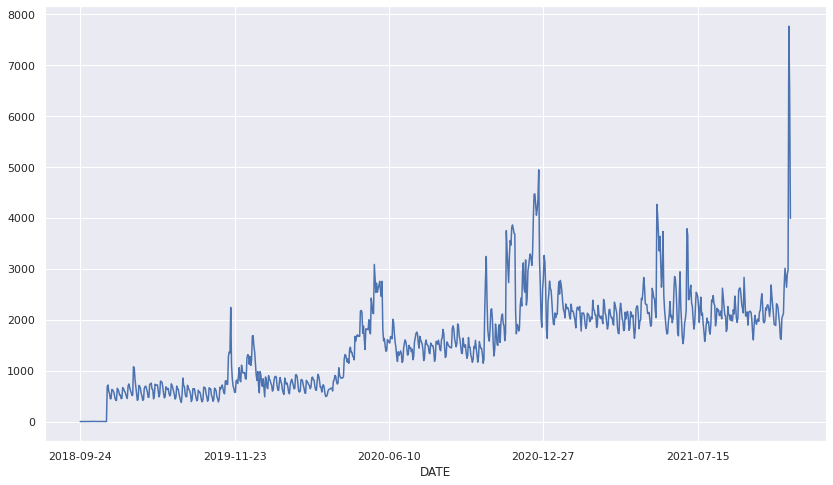

In [275]:
df_series.groupby(['DATE'])['UNITS_SOLD'].sum().plot()

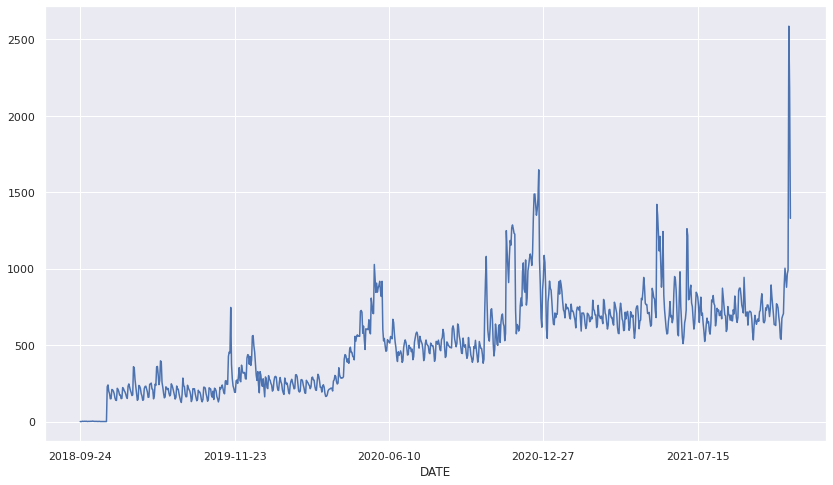

In [279]:
#A categoria 3 faz com que tenhamos uma tendencia forte de crescimento
# Também tivemos um crescimento significativo no final do ano para as categorias 1 e 3
df_series.groupby(['DATE'])['UNITS_SOLD'].mean().plot()

In [286]:
ts = df_series.set_index("DATE")

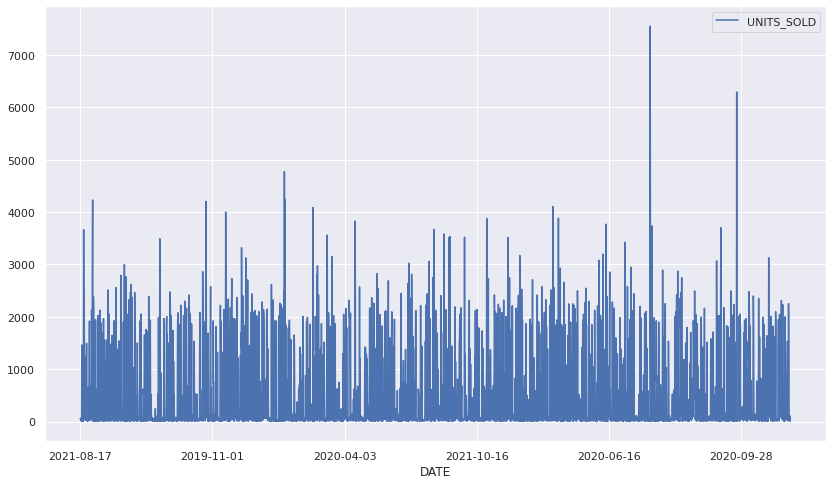

In [287]:
ts.plot()

Também já conseguimos notar que nossa serie não é estacionaria, mas por via das dúvidas vamos rodar um teste de estacionariedade.

Referencias para futuros estudos:

https://medium.com/horadecodar/

https://pandas.pydata.org/docs/user_guide/visualization.html

https://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016#AR=